# Amazon E-Commerce Sales — Exploratory Data Analysis

# 1. Introduction


 This project performs Exploratory Data Analysis (EDA) on an Amazon e-commerce sales dataset to understand sales performance, customer behavior, and profitability trends.The analysis focuses on data cleaning, preprocessing, and visualization to uncover actionable business insights that can support better decision-making.

# 2. Data Overview

#### **Source:** Kaggle — Amazon E-Commerce Sales Dataset

* **Type**: Transactional e-commerce sales data
* **Rows**: 128975
* **Columns**: 24

This dataset contains detailed information about Amazon online sales transactions, including order details, product categories, sales values, and order fulfillment status. It is suitable for exploratory analysis aimed at identifying sales trends, profitability drivers, and category-level performance.

The dataset enables analysis across multiple dimensions such as time, category, sales channel, and order status, making it valuable for business-oriented data analysis and decision-making.


## 3. Data Understanding


In [3]:
# Importing required Python libraries
import pandas as pd          # For data handling and cleaning
import numpy as np           # For numerical operations
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns        # For data visualization


In [4]:
df = pd.read_csv("Amazon Sale Report.csv", low_memory=False)
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [6]:
df.describe()

,index,Qty,Amount,ship-postal-code
count,128975.000000,128975.000000,121180.000000,128942.000000
mean,64487.000000,0.904431,648.561465,463966.236509
std,37232.019822,0.313354,281.211687,191476.764941
min,0.000000,0.000000,0.000000,110001.000000
25%,32243.500000,1.000000,449.000000,382421.000000
50%,64487.000000,1.000000,605.000000,500033.000000
75%,96730.500000,1.000000,788.000000,600024.000000
max,128974.000000,15.000000,5584.000000,989898.000000


## ## 4. Data Quality Assessment


Missing values were handled based on the nature of each feature. Categorical columns with meaningful absence were either retained or converted into binary flags to preserve business context. Columns that contained no analytical value were removed, and duplicate records were identified and dropped to ensure data integrity.

In [7]:
df_copy = df.copy()

In [8]:
df_copy.isnull().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
B2B                       0
fulfilled-by          89698
Unnamed: 22           49050
dtype: int64

In [10]:
df_copy['Courier Status'].isnull().sum()

np.int64(6872)

In [12]:
df_copy['Courier Status'] = df_copy['Courier Status'].fillna(df_copy['Courier Status'].mode()[0])

In [17]:
df_copy['currency'].isnull().sum()

np.int64(7795)

In [19]:
df_copy['currency'] = df_copy['currency'].fillna(df_copy['currency'].mode()[0])

In [25]:
df_copy['Amount'].isnull().sum()

np.int64(7795)

<Axes: ylabel='Amount'>

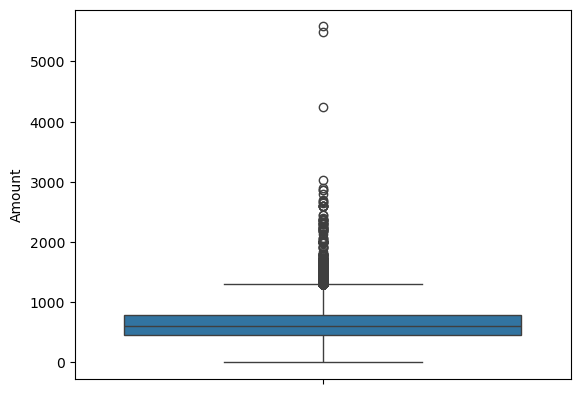

In [26]:
sns.boxplot(y = df_copy['Amount'])

In [27]:
df_copy['Amount'] = df_copy['Amount'].fillna(df_copy['Amount'].median())

In [31]:
df_copy["ship-city"].isnull().sum()

np.int64(33)

In [32]:
df_copy["ship-city"] = df_copy["ship-city"].fillna(df_copy["ship-city"].mode()[0])

In [36]:
df_copy["ship-state"].isnull().sum()

np.int64(33)

In [38]:
df_copy["ship-state"] = df_copy["ship-state"].fillna(df_copy["ship-state"].mode()[0])

In [42]:
df_copy["ship-postal-code"].isnull().sum()

np.int64(33)

<Axes: ylabel='ship-postal-code'>

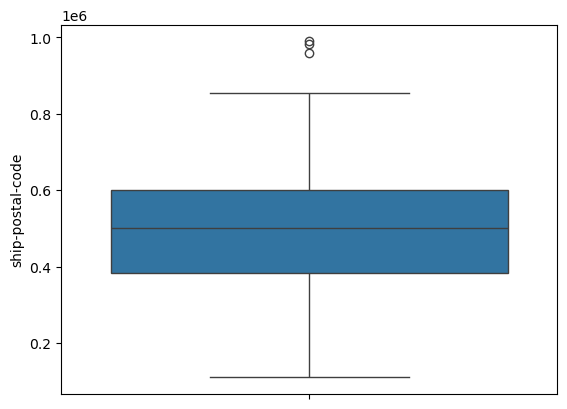

In [43]:
sns.boxplot(y = df_copy["ship-postal-code"])

In [44]:
df_copy["ship-postal-code"] = df_copy["ship-postal-code"].fillna(df_copy["ship-postal-code"].median())

In [49]:
df_copy["ship-country"] = df_copy["ship-country"].fillna(df_copy["ship-country"].mode()[0])

In [53]:
df_copy["promotion-ids"] = df_copy["promotion-ids"].notna().astype(int)

In [56]:
df_copy["fulfilled-by"] = df_copy["fulfilled-by"].notna().astype(int)

In [58]:
df_copy.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,0,False,1,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,1,False,1,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,1,True,0,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,0,False,1,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,0,False,0,NaN


In [60]:
df_copy.drop(columns=["Unnamed: 22"], inplace=True)


In [62]:
df_copy.drop(columns = ["index"], inplace = True)

In [63]:
df_copy.head()

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,...,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,...,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,0,False,1
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,...,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,1,False,1
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,...,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,1,True,0
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,...,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,0,False,1
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,...,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,0,False,0


In [64]:
df_copy.duplicated().sum()

np.int64(6)

In [65]:
df_copy.drop_duplicates(inplace = True)

In [68]:
df_copy.shape

(128969, 22)

## 5. Feature Engineering


The dataset now contains 128,969 records with no missing values. Categorical, numerical, and boolean features are appropriately typed for analysis. Date components were extracted to support time-based analysis, and binary flags were created for promotion usage and fulfillment assignment to simplify interpretation.

In [69]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 128969 entries, 0 to 128974
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Order ID            128969 non-null  object 
 1   Date                128969 non-null  object 
 2   Status              128969 non-null  object 
 3   Fulfilment          128969 non-null  object 
 4   Sales Channel       128969 non-null  object 
 5   ship-service-level  128969 non-null  object 
 6   Style               128969 non-null  object 
 7   SKU                 128969 non-null  object 
 8   Category            128969 non-null  object 
 9   Size                128969 non-null  object 
 10  ASIN                128969 non-null  object 
 11  Courier Status      128969 non-null  object 
 12  Qty                 128969 non-null  int64  
 13  currency            128969 non-null  object 
 14  Amount              128969 non-null  float64
 15  ship-city           128969 non-null  ob

In [80]:

df_copy["Date"]


0         04-30-22
1         04-30-22
2         04-30-22
3         04-30-22
4         04-30-22
            ...   
128970    05-31-22
128971    05-31-22
128972    05-31-22
128973    05-31-22
128974    05-31-22
Name: Date, Length: 128969, dtype: object

In [86]:
df_copy["Day_new"] = df_copy["Date"].str.split("-").str[1]
df_copy["Month_new"] = df_copy["Date"].str.split("-").str[0]
df_copy["Year_new"] = df_copy["Date"].str.split("-").str[2]

In [89]:
df_copy["Year_new"].isnull().sum()

np.int64(0)

In [91]:
df_copy["Day_new"] = df_copy["Day_new"].astype(int)
df_copy["Month_new"] = df_copy["Month_new"].astype(int)
df_copy["Year_new"] = df_copy["Year_new"].astype(int)

In [96]:
df_copy.head()

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,...,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Month,Date_new,Month_new,Day_new,Year_new
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,...,400081.0,IN,0,False,1,04,NaN,4,30,22
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,...,560085.0,IN,1,False,1,04,NaN,4,30,22
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,...,410210.0,IN,1,True,0,04,NaN,4,30,22
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,...,605008.0,IN,0,False,1,04,NaN,4,30,22
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,...,600073.0,IN,0,False,0,04,NaN,4,30,22


In [99]:
df_copy.drop(columns = ["Month" ],inplace = True)

## 6. Exploratory Data Analysis (EDA)


This section explores the dataset through univariate, bivariate, and time-based analysis to uncover patterns, trends, and relationships within the data.

### 6.1 Univariate Analysis

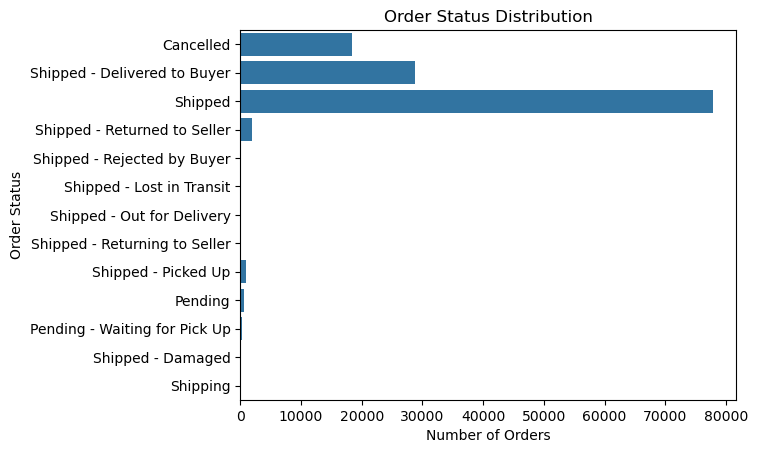

In [141]:
sns.countplot(y = df_copy["Status"]) #Categorical data
plt.title("Order Status Distribution")
plt.xlabel("Number of Orders")
plt.ylabel("Order Status")
plt.show()

The majority of orders fall under the Shipped and Shipped - Delivered to Buyer statuses, indicating effective order fulfillment and delivery operations. Although a portion of orders are cancelled, their volume is significantly lower compared to successful shipments, suggesting relatively 
stable sales and logistics performance.


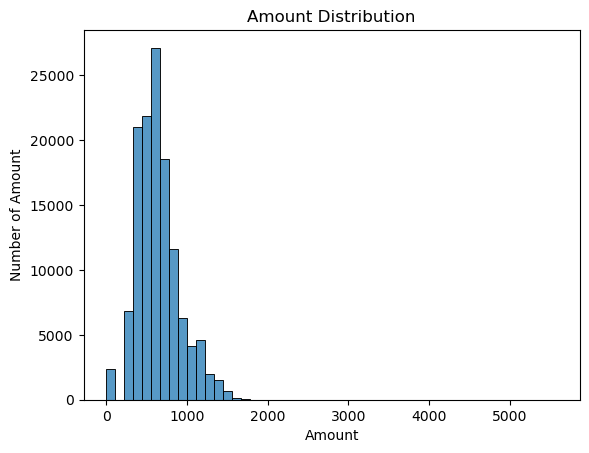

In [136]:
sns.histplot(df_copy["Amount"], bins=50)
plt.title("Amount Distribution")
plt.xlabel("Amount")
plt.ylabel("Number of Amount")
plt.show()

The order amount distribution is right-skewed, with the majority of transactions concentrated in the lower price range. A small number of high-value orders create a long tail, indicating the presence of outliers that may significantly impact total revenue despite their low frequency.

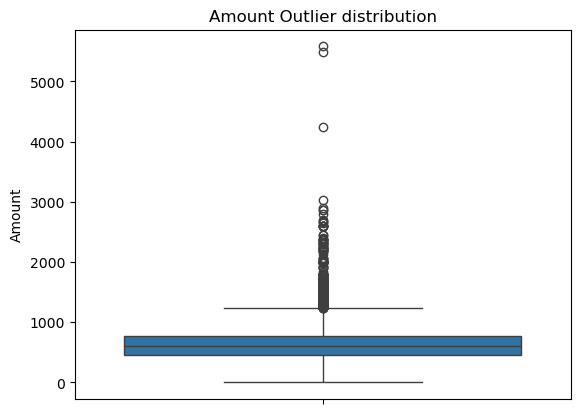

In [139]:
sns.boxplot(df_copy["Amount"])
plt.title("Amount Outlier distribution")
plt.show()

The boxplot reveals a large number of high-value outliers in the order amount distribution. While most transactions fall within a relatively low price range, a small proportion of orders have significantly higher values, which can disproportionately influence total revenue.

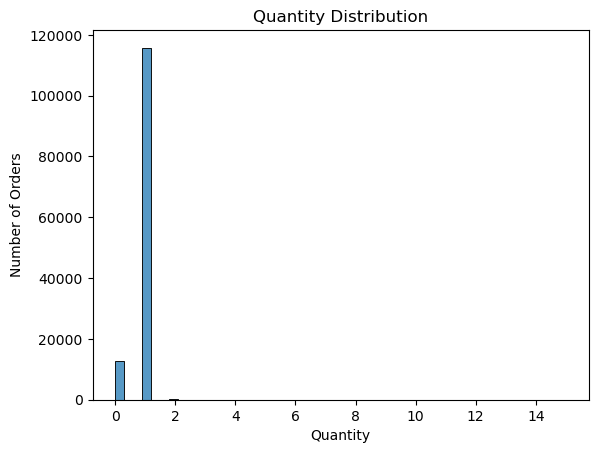

In [150]:
sns.histplot(x = df_copy["Qty"], bins = 50)
plt.title("Quantity Distribution")
plt.xlabel("Quantity")
plt.ylabel("Number of Orders")
plt.show()

The quantity distribution is heavily skewed toward single-item purchases, with the majority of orders having a quantity of one. Bulk purchases are relatively rare, indicating that most customers place individual product orders rather than buying in large quantities.

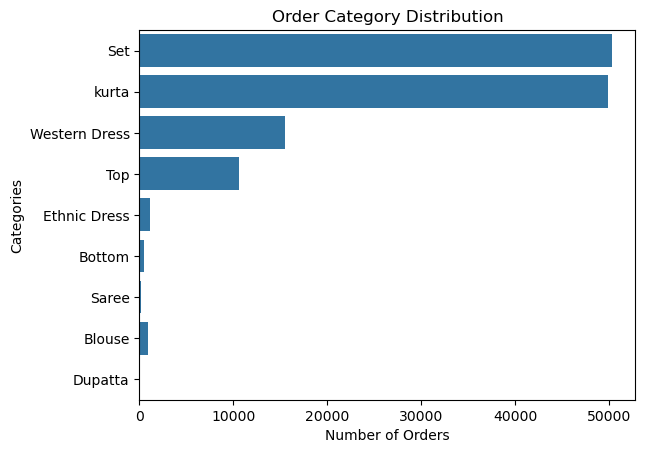

In [147]:
sns.countplot(y = df_copy["Category"]) #Categorical data
plt.title("Order Category Distribution")
plt.xlabel("Number of Orders")
plt.ylabel("Categories")
plt.show()

The order distribution is heavily concentrated in the Set and Kurta categories, indicating strong customer preference for these products. Other categories contribute significantly fewer orders, suggesting a long-tail product mix with demand concentrated in a limited number of core categories.

### 6.2 Bivariate Analysis


#### Amount vs Order Status


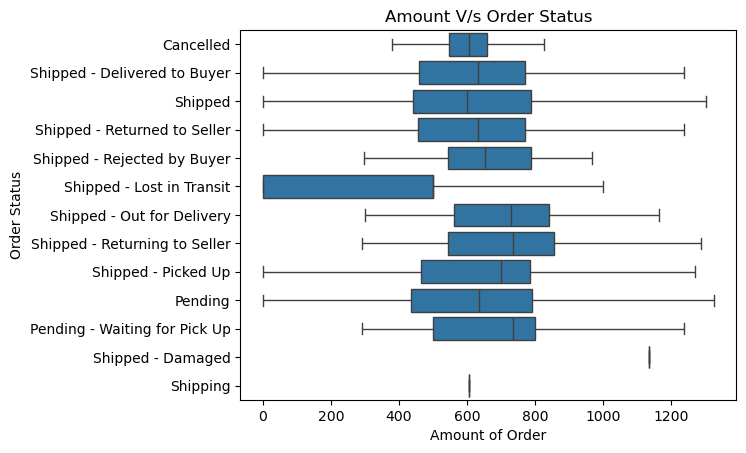

In [170]:
sns.boxplot( x = df_copy["Amount"] , y = df_copy["Status"], showfliers = False)
plt.title("Amount V/s Order Status")
plt.xlabel("Amount of Order")
plt.ylabel("Order Status")
plt.show()


Successfully shipped and delivered orders exhibit higher median order values and a wider distribution compared to cancelled orders. Cancelled orders are generally associated with lower transaction amounts, while high-value orders are more likely to be successfully completed, indicating a positive relationship between order value and fulfillment success.

#### Amount vs Promotion applied



In [171]:
df_copy.rename(columns={"promotion-ids": "promotion_applied"}, inplace=True)

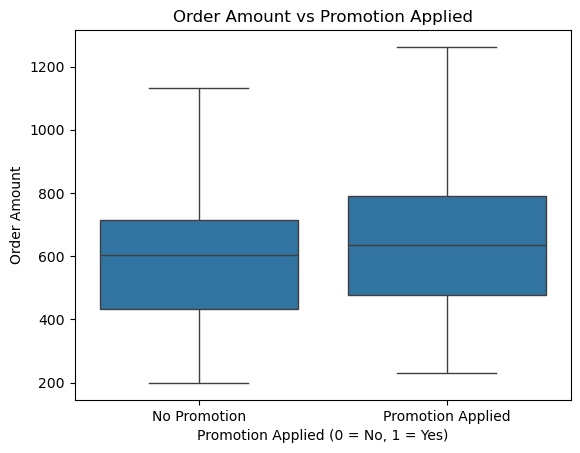

In [173]:
sns.boxplot(
    x=df_copy["promotion_applied"],
    y=df_copy["Amount"],
    showfliers=False
)

plt.title("Order Amount vs Promotion Applied")
plt.xlabel("Promotion Applied (0 = No, 1 = Yes)")
plt.ylabel("Order Amount")
plt.xticks([0, 1], ["No Promotion", "Promotion Applied"])
plt.show()


Orders with promotions applied tend to have a higher median order value compared to orders without promotions. However, high-value orders are also observed in the absence of promotions, indicating that promotions are not the sole driver of larger purchases.

#### Category vs Shipping State



In [174]:
df_copy.columns

Index(['Order ID', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion_applied',
       'B2B', 'fulfilled-by', 'Month_new', 'Day_new', 'Year_new'],
      dtype='object')

In [179]:
top_states = df_copy["ship-state"].value_counts().head(5).index
top_categories = df_copy["Category"].value_counts().head(5).index

filtered_df = df_copy[
    (df_copy["ship-state"].isin(top_states)) &
    (df_copy["Category"].isin(top_categories))DD
]


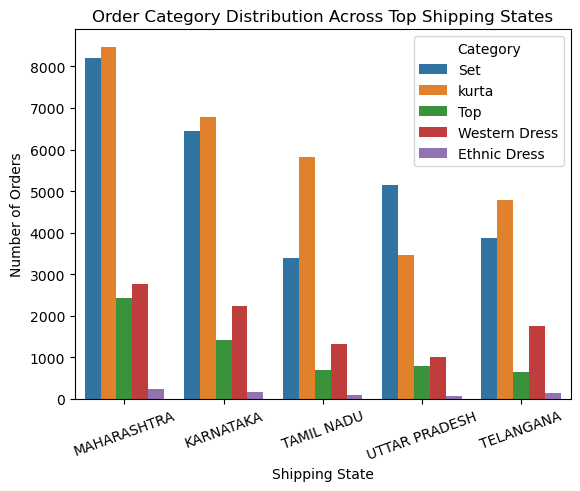

In [185]:
sns.countplot(
    data=filtered_df,
    x="ship-state",
    hue="Category"
)

plt.title("Order Category Distribution Across Top Shipping States")
plt.xlabel("Shipping State")
plt.ylabel("Number of Orders")
plt.xticks(rotation=20)
plt.show()


Order category demand varies across major shipping states, with Set and Kurta consistently dominating order volumes across all regions. While Maharashtra and Karnataka generate the highest overall demand, variations in category preferences are observed across states, indicating regional differences in customer purchasing behavior. This suggests opportunities for state-specific inventory planning and targeted marketing strategies.

### 6.3 Time-Based Analysis


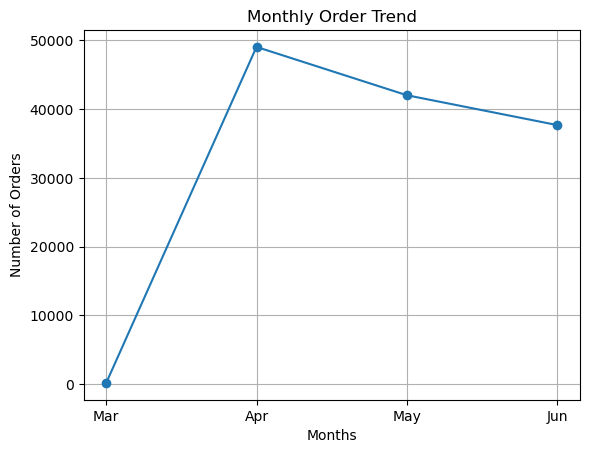

In [202]:
monthly_orders = df_copy.groupby("Month_new")["Order ID"].count()
monthly_orders.plot(kind = "line" , marker = "o")
plt.title("Monthly Order Trend")
plt.xlabel("Months")
plt.ylabel("Number of Orders")
plt.xticks([3,4,5,6], ["Mar", "Apr", "May", "Jun"])
plt.grid(True)
plt.show()

The dataset covers a limited time period from March to June. Order volume increases sharply from March to April, reaching a peak in April, followed by a gradual decline in May and June. This pattern suggests a short-term surge in customer activity during April, potentially driven by seasonal demand or promotional campaigns.

**Note**: The time-based analysis is limited to the available months in the dataset and does not represent a full annual trend.

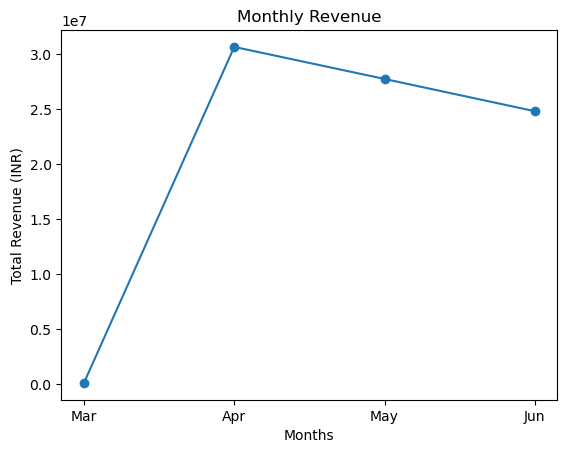

In [207]:
monthly_revenue = df_copy.groupby("Month_new")["Amount"].sum()
monthly_revenue.plot(kind = "line" , marker = "o" )
plt.title("Monthly Revenue")
plt.xlabel("Months")
plt.ylabel("Total Revenue (INR)")
plt.xticks([3,4,5,6], ["Mar", "Apr", "May", "Jun"])
plt.show()

Monthly revenue follows a trend similar to order volume, with a sharp increase from March to April and a gradual decline through May and June. The alignment between order volume and revenue suggests stable average order values across the observed months, indicating that changes in revenue are primarily driven by fluctuations in order activity.

## 7.Key Insights

* The majority of orders are successfully shipped and delivered, indicating efficient order fulfillment, while cancellations remain comparatively low.

 * Order amounts are **right-skewed**, with most transactions in the lower price range and a small number of high-value orders contributing significantly to total revenue.

* Customer purchasing behavior is dominated by **single-item orders**, with bulk purchases **occurring infrequently**.

* **Set** and **Kurta** categories account for the highest order volumes across all major shipping states, highlighting concentrated demand in a few core product categories.

* Orders with promotions applied tend to have a slightly higher median order value, suggesting promotions can encourage increased spending, though high-value purchases also occur without promotions.

* Geographic analysis shows **regional variation** in category demand, indicating differences in customer preferences across states.

* Time-based analysis reveals a **sharp surge in orders and revenue** during April, followed by a **gradual decline through May and June**, reflecting short-term seasonal or promotional effects.

## 8. Conclusion & Business Recommendations

* Focus inventory and marketing efforts on **high-performing categories** such as Set and Kurta, as they consistently drive order volume across regions.

* Leverage **targeted promotions** during peak demand periods (e.g., April-like cycles) to maximize revenue impact.

* Use **state-level demand patterns** to optimize regional inventory allocation and reduce fulfillment delays.

* Monitor cancellation patterns for lower-value orders to identify opportunities for improving customer experience and conversion.

* Extend future analysis across a **longer time horizon** to better capture seasonal trends and annual performance patterns

This analysis provides data-driven insights into customer behavior, product performance, and temporal trends, supporting informed decision-making for inventory planning, marketing strategy, and operational optimization.